**UPLOADING DATASET**

In [1]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train (1).csv


**DATASET EXPLANATION**

The dataset we are working with captures details from a meal delivery company that operates across various cities. Each record corresponds to a unique instance of a meal order. Here's a breakdown of the key columns:

**id:** Each record is assigned a unique identifier.

**week:** This column indicates the week number during which the data was recorded, which is crucial for understanding trends over time.

**center_id:**Identifies the fulfillment center responsible for dispatching the meal orders.

**meal_id:** Specifies the particular meal being ordered.

**checkout_price:** Reflects the price at which a customer checks out with their meal.

**base_price:** Represents the original (base) price of the meal.

**emailer_for_promotion:** A binary variable (0 or 1) indicating
 whether an email promotion was utilized for the meal.

**homepage_featured:** Another binary variable (0 or 1) signaling whether the meal was featured on the homepage.

**num_orders:** This is the target variable, denoting the number of meal orders for a given instance.

Essentially, the dataset allows us to delve into the company's operations and gain insights into demand forecasting. We're interested in understanding how factors like pricing, promotions (via email), and homepage features impact the number of meal orders. Given the 'week' column, it's evident that we're dealing with a time-series dataset, making it suitable for time-dependent analyses.

The company's focus on demand forecasting suggests a need to plan stock and staffing efficiently. Analyzing the interplay between various factors and the number of meal orders can provide valuable insights for optimizing business strategies.

**Load Dataset:**

In [2]:
import pandas as pd


df = pd.read_csv('/content/train.csv')

# Display the first few rows to verify the data
df.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


**Exploratory Data Analysis (EDA):**

**Check Data Types and Missing Values:**

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


**Descriptive Statistics:**

In [4]:
df.describe()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


**Data Visualization:**

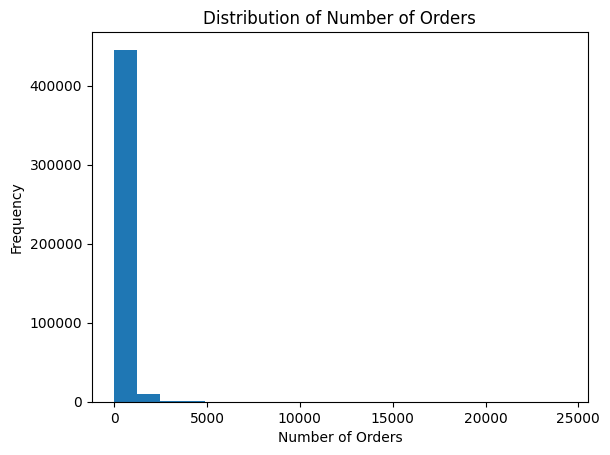

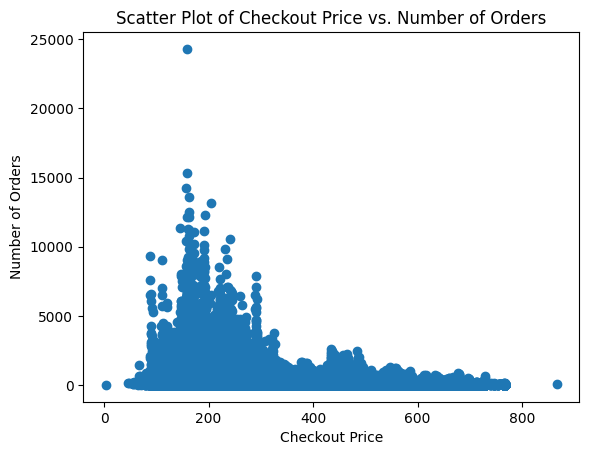

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of num_orders
plt.hist(df['num_orders'], bins=20)
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Orders')
plt.show()

# Example: Scatter plot of checkout_price vs. num_orders
plt.scatter(df['checkout_price'], df['num_orders'])
plt.xlabel('Checkout Price')
plt.ylabel('Number of Orders')
plt.title('Scatter Plot of Checkout Price vs. Number of Orders')
plt.show()


**Pair Plots:**

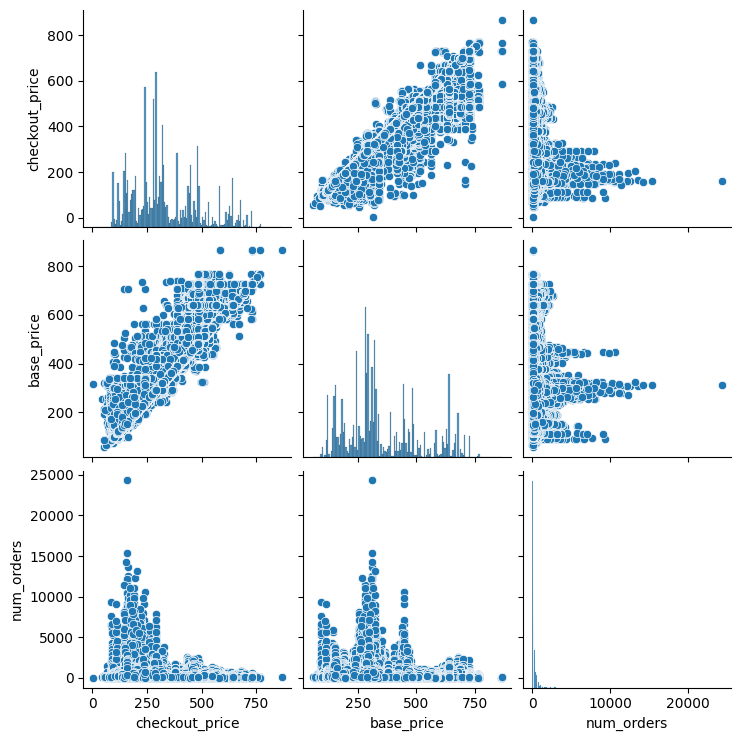

In [11]:
sns.pairplot(df[['checkout_price', 'base_price', 'num_orders']])
plt.show()


**Predictive Analytics:**

**Feature Engineering:**

In [8]:
#  Creating a feature for the difference between checkout_price and base_price
df['price_difference'] = df['base_price'] - df['checkout_price']


**Multiple Linear Regression:**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#  Using checkout_price and homepage_featured as features
X = df[['checkout_price', 'homepage_featured']]
y = df['num_orders']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 128414.74376244504


In [13]:
X = df[['checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']]
y = df['num_orders']


**Correlation Analysis:**

**Correlation Matrix:**

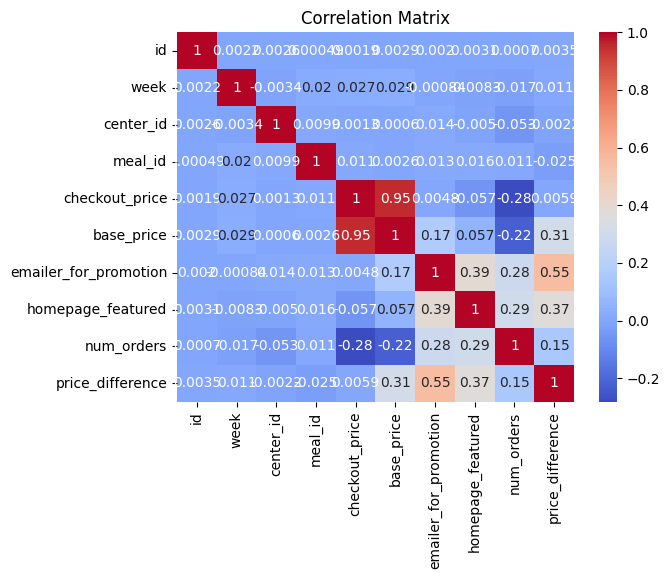

In [10]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**cluster analysis using K-means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

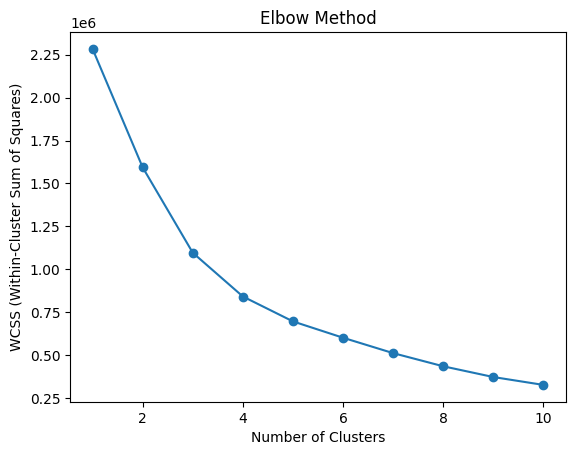

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Select relevant features for clustering
features_for_clustering = ['checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']

# Subset the dataset with selected features
data_for_clustering = df[features_for_clustering]

# Standardize the data
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_for_clustering_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


**determining the optimal number of clusters based on the plot and performe K-means clustering with the chosen number:**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


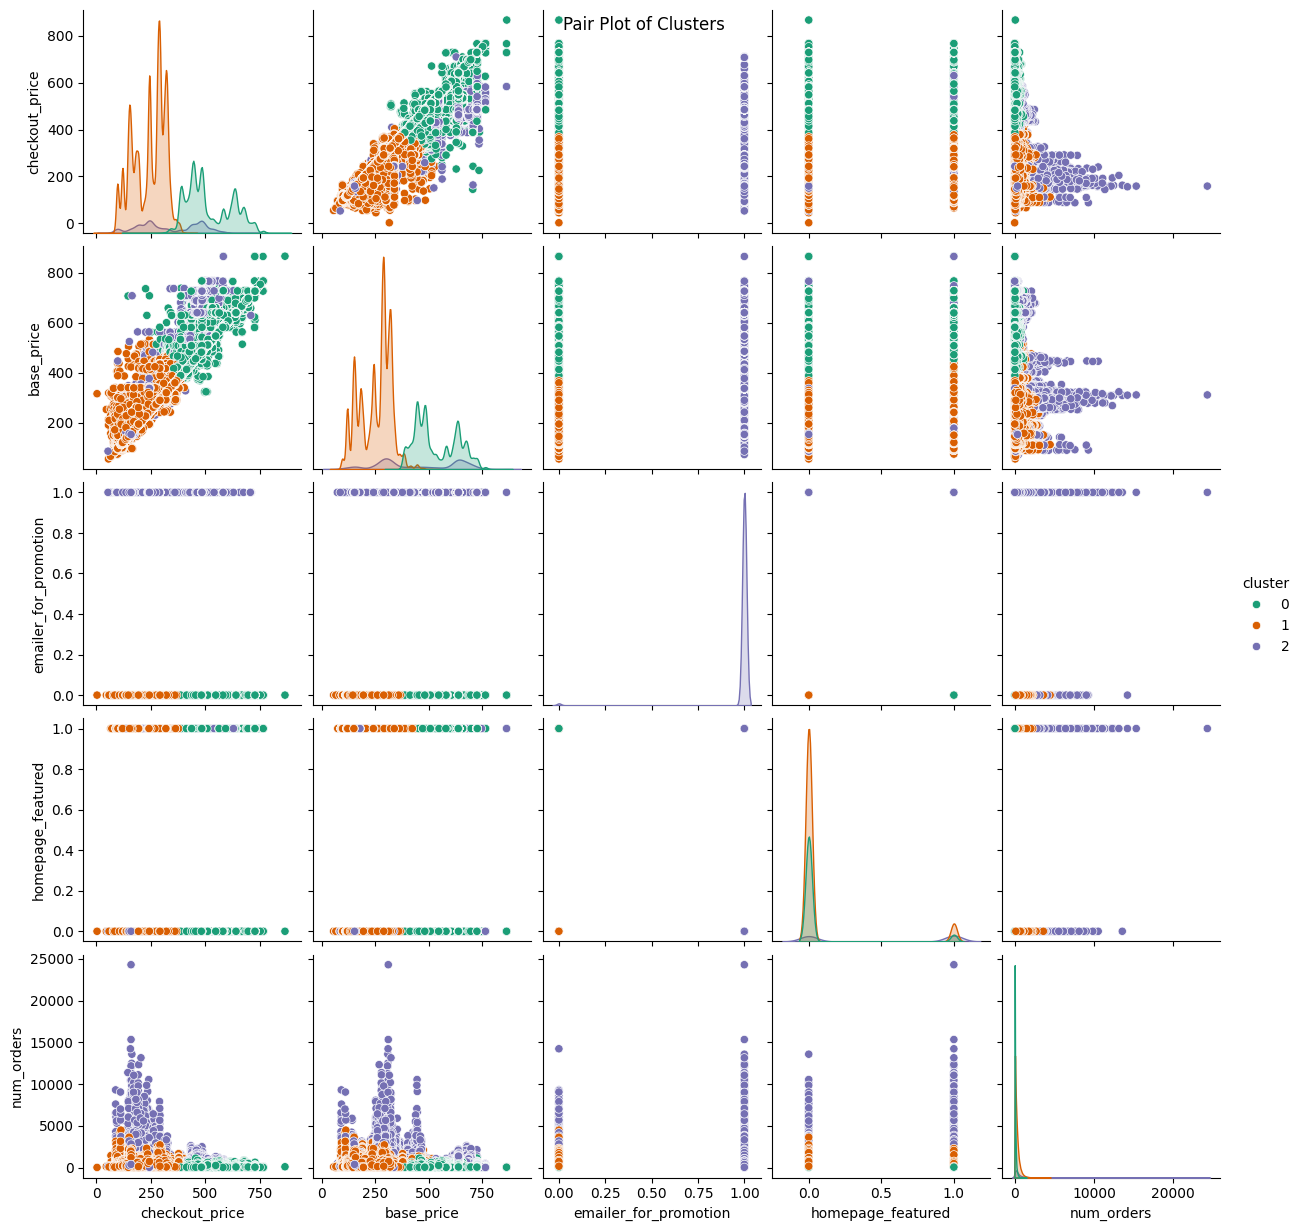

In [15]:
# Choose the optimal number of clusters (elbow point)
optimal_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
df['cluster'] = kmeans.fit_predict(data_for_clustering_scaled)

# Visualize the clusters
sns.pairplot(df, hue='cluster', vars=features_for_clustering, diag_kind='kde', palette='Dark2')
plt.suptitle('Pair Plot of Clusters')
plt.show()
